# ***Backtest Halt na média, stop e alvo fixos***

---

## **1. Bibliotecas**

In [ ]:
# %pip install ta 
# %pip install vectorbt

In [2]:
# Análise e manipulação de dados gerais
import os
import numpy as np
import pandas as pd

# Dados séries temporais
from datetime import datetime, timedelta
import pytz

# Dados OHLCV
#import MetaTrader5 as mt5

# Indicadores e backtesting
import ta
import vectorbt as vbt

# Bibliotecas gráficas
import plotly.graph_objects as go

## **2. Obtenção dos Dados**

In [3]:
dados_ohlc = pd.read_excel('C:\\Users\\joaog\\Documents\\GitHub\\quant-traders\\codigos-antigos-seq\\WDO$_5M.xlsx', index_col='time', parse_dates=True) # Importar dados csv
dados_ohlc.head(10)

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe
time,,,,,,,,,
2018-02-28 09:00:00,3994.277,3999.182,3993.050,3994.890,2237,1,6108,WDO$,5M
2018-02-28 09:05:00,3994.277,3999.795,3993.050,3997.956,3048,1,7668,WDO$,5M
2018-02-28 09:10:00,3998.569,3998.569,3993.663,3993.663,2786,1,8455,WDO$,5M
2018-02-28 09:15:00,3994.277,3994.277,3991.211,3991.824,2520,1,8081,WDO$,5M
2018-02-28 09:20:00,3991.824,3993.050,3988.758,3990.598,2723,1,7806,WDO$,5M
2018-02-28 09:25:00,3990.598,3991.824,3988.145,3990.598,2772,1,7800,WDO$,5M
2018-02-28 09:30:00,3989.984,3992.437,3988.758,3989.371,2514,1,7238,WDO$,5M
2018-02-28 09:35:00,3988.758,3990.598,3986.918,3989.371,2685,1,8031,WDO$,5M
2018-02-28 09:40:00,3989.371,3991.824,3988.758,3988.758,1845,1,5296,WDO$,5M


## **3. Criar Funções para localizar os sinais de entrada**

In [4]:
df = dados_ohlc.copy()
mm = 20
df['mm'] = df['close'].rolling(mm).mean()
df['entrada'] = False

In [5]:
def sinal_compra(open, high, low, close, mm):
    cond1 = low < mm
    cond2 = close > mm
    cond3 = low.shift(1) > mm
    cond4 = low.shift(2) > mm
    cond5 = low.shift(3) > mm
    cond6 = low.shift(4) > mm
    cond7 = low.shift(5) > mm
    cond8 = low.shift(6) > mm
    cond9 = low.shift(7) > mm
    cond10 = low.shift(8) > mm
    cond11 = low.shift(9) > mm
    cond12 = low.shift(10) > mm

    
    return(cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7) # & cond8 & cond9 \
           # & cond10 & cond11 & cond12)  

df['sinal_compra'] = sinal_compra(df['open'], df['high'], df['low'], df['close'], df['mm'])

**Nota:** Aqui você consegue filtrar apenas os dias que representaram candles sinalizadores

In [6]:
halt_compra = df[df['sinal_compra'] == True]
halt_compra

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm,entrada,sinal_compra
time,,,,,,,,,,,,
2018-02-28 17:05:00,3989.984,3990.598,3986.918,3988.145,905,1,3290,WDO$,5M,3986.9798,False,True
2018-03-05 11:50:00,4010.219,4010.219,4006.540,4007.767,1505,1,5281,WDO$,5M,4007.4602,False,True
2018-03-06 11:55:00,3966.683,3967.297,3965.457,3967.297,1824,1,7055,WDO$,5M,3965.8863,False,True
2018-03-09 15:20:00,3996.116,3997.343,3993.663,3996.116,2043,1,7612,WDO$,5M,3995.0431,False,True
2018-03-12 11:55:00,4005.927,4006.540,4004.088,4005.314,1304,1,4492,WDO$,5M,4004.4556,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 09:00:00,5175.000,5187.500,5175.000,5187.500,17860,1,50405,WDO$,5M,5184.2500,False,True
2023-03-10 10:30:00,5220.000,5243.500,5204.000,5207.000,48460,1,156464,WDO$,5M,5204.6000,False,True
2023-03-13 13:55:00,5260.000,5262.500,5257.500,5259.500,5487,1,17878,WDO$,5M,5258.1750,False,True


### ***3.1 Plots candles sinalizadores***

**Nota:** Aqui você consegue plotar os sinais pelo numero do índice

In [157]:
n_indice = 13

inicio_index = halt_compra.index[n_indice] - timedelta(minutes=50)
final_index = halt_compra.index[n_indice]
data_range = pd.date_range(start=inicio_index, end=final_index, freq='T')
df_figure = df[df.index.isin(data_range)]
df_figure = df_figure.iloc[0:11]

fig_halt_compra = go.Figure(data=[go.Candlestick(name=halt_compra.ticker[0],x=df_figure.index, open=df_figure['open'], high = df_figure['high'],
                                              low=df_figure['low'], close=df_figure['close'],increasing_line_color= 'green',
                                              decreasing_line_color= 'red', showlegend=True)])

fig_halt_compra.add_vrect(x0=df_figure.index[-2]+timedelta(minutes=3), x1=(df_figure.index[-1]+timedelta(minutes=2)), fillcolor="gray", opacity=0.25)

fig_halt_compra.add_trace(go.Scatter(name='MM', x=df_figure.index, y=df_figure['mm'], marker_color='black'))

fig_halt_compra = fig_halt_compra.update_layout(xaxis_rangeslider_visible=False, title_text='<b>Candle halt compra',template = 'simple_white',
                            margin=dict(l=20, r=20, t=70, b=20), paper_bgcolor="#f7f8fa",width=400,height=400,
                            legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))

fig_halt_compra

In [16]:
# esse número representa cada candle sinalizador observado no filtro anterior (código da última semana)
n_indice = 10

# aqui pegaremos tres candles anteriores ao sinal (10 min, sendo timeframe de 5min) e 15 candles à frente (75min)
inicio_index = halt_compra.index[n_indice] - timedelta(minutes=15)
final_index = halt_compra.index[n_indice] + timedelta(minutes=150)

# filtramos nosso dataframe de ohlc
data_range = pd.date_range(start=inicio_index, end=final_index, freq='T')
df_figure = df[df.index.isin(data_range)]

# dessa forma apresentaremos 15 candles, sendo o sinal o terceiro candle (indexação 2 no python, já que começa do zero)
df_figure = df_figure.iloc[0:50]
candle_sinal = 3

# condições de entrada, alvos e stops descritos no post
entrada = df_figure.high.iloc[candle_sinal] + 0.01
stop_loss_candle_sinal = df_figure.low.iloc[candle_sinal] - 0.01
alvo_2x_candle_sinal = entrada + 2*(df_figure.high.iloc[candle_sinal] - df_figure.low.iloc[candle_sinal])

# Candlesticks
fig_halt_compra_result = go.Figure(data=[go.Candlestick(name=halt_compra.ticker[0],x=df_figure.index, open=df_figure['open'], high = df_figure['high'],
                                              low=df_figure['low'], close=df_figure['close'],increasing_line_color= 'green',
                                              decreasing_line_color= 'red', showlegend=True)])

# Candle sinal e entrada
fig_halt_compra_result.add_vrect(x0=df_figure.index[candle_sinal]-timedelta(minutes=2), x1=(df_figure.index[candle_sinal]+timedelta(minutes=2)), fillcolor="gray", opacity=0.25)

fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2),df_figure.index[-1]], 
                                    y=[df_figure.high[candle_sinal]+0.01,df_figure.high[candle_sinal]+0.01],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="black",
                                    name="Entrada", text=[" Máx sinal + 1 tick"], textposition="top right", showlegend=True))

# Linha delimitação do Stop loss
fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2), df_figure.index[-1]], 
                                    y=[stop_loss_candle_sinal, stop_loss_candle_sinal],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="red",
                                    name="Stop Loss", text=[" Mín sinal - 1 tick"], textposition="bottom right", showlegend=True))

# Linha delimitação do Take profit
fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2),df_figure.index[-1]], 
                                    y=[alvo_2x_candle_sinal, alvo_2x_candle_sinal],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="green",
                                    name="Take profit", text=["Proj. 2x candle sinal"], textposition="top right", showlegend=True))

fig_halt_compra_result.add_trace(go.Scatter(name='mm', x=df_figure.index, y=df_figure['mm'], marker_color='black'))

# Configurações do layout, como fundo branco, tamanho da imagem, margens, titulo do gráfico...
fig_halt_compra_result.update_layout(xaxis_rangeslider_visible=False, title_text='<b>PFR Compra Take profit / Stop loss',template = 'simple_white',
                            margin=dict(l=20, r=20, t=100, b=20), paper_bgcolor="#f7f8fa",width=800,height=600,
                            font=dict(family="Arial",size=17, color = 'black'),
                            legend=dict(orientation="h",yanchor="top",y=1.1,xanchor="right",x=1.05))

## **4 - Organizando preços de entrada, stop loss e take profit**

### ***4.1 Retorno 1 para 2***

In [28]:
tick_min = 0.5
alvo = 2
position = 0

ls_precos_compra = []
ls_datas_compras = []
ls_precos_venda = []
ls_datas_vendas = []

for i in range(len(df)):
    if (position==0) and (df['sinal_compra'].iloc[i]==True) and (df['open'].index[i].hour<16):
        max_prox_candle = df['high'].shift(-1).iloc[i]
        condicao_entrada = (max_prox_candle >= (df['high'].iloc[i] + tick_min))

        if condicao_entrada == True:
            min_prox_candle = df['low'].shift(-1).iloc[i]
            position = 1
            df['entrada'].iloc[i] = True           
            preco_compra = df['high'].iloc[i] + tick_min
            ls_precos_compra.append(preco_compra)
            ls_datas_compras.append(df.index[i+1])
            stop_loss = df['low'].iloc[i] - tick_min
            take_profit = preco_compra + ((df['high'].iloc[i] - df['low'].iloc[i])*alvo)

            if min_prox_candle < df['low'].iloc[i]:
                ls_precos_venda.append(stop_loss)
                ls_datas_vendas.append(df.index[i+1])
                position = 0

    elif (position==1) and ( (df['low'].iloc[i] <= stop_loss) or (df['open'].index[i].hour > 17) ):
        ls_precos_venda.append(stop_loss)
        ls_datas_vendas.append(df.index[i])
        position = 0

    elif (position==1) and ( (df['high'].iloc[i] >= take_profit) or (df['open'].index[i].hour > 17) ):
        ls_precos_venda.append(take_profit)
        ls_datas_vendas.append(df.index[i])
        position = 0 

tabela_resultados = pd.DataFrame(zip(ls_datas_compras, ls_precos_compra, ls_datas_vendas, ls_precos_venda), columns=['Data_compra', 'Preco_compra', 'Data_venda', 'Preco_venda'])
tabela_resultados['Data_compra'] = pd.to_datetime(tabela_resultados['Data_compra'], errors='ignore')
tabela_resultados['Data_venda'] = pd.to_datetime(tabela_resultados['Data_venda'], errors='ignore')
tabela_resultados['Capital'] = tabela_resultados.Preco_venda / tabela_resultados.Preco_compra
tabela_resultados['Capital'].cumprod()[-1:]

C:\Users\joaog\AppData\Local\Temp\ipykernel_7764\102676024.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



305    1.030942
Name: Capital, dtype: float64

In [62]:
alvos = {0.3:None, 0.5:None, 0.7:None, 1:None, 1.2:None, 1.5:None, 2:None, 2.5:None, 3:None, 4:None, 5:None, 6:None,
         7:None, 8:None, 9:None, 10:None}

for key, value in alvos.items():

    tick_min = 0.5
    alvo = key
    position = 0

    ls_precos_compra = []
    ls_datas_compras = []
    ls_precos_venda = []
    ls_datas_vendas = []

    for i in range(len(df)):
        if (position==0) and (df['sinal_compra'].iloc[i]==True) and (df['open'].index[i].hour<16):
            max_prox_candle = df['high'].shift(-1).iloc[i]
            condicao_entrada = (max_prox_candle >= (df['high'].iloc[i] + tick_min))

            if condicao_entrada == True:
                min_prox_candle = df['low'].shift(-1).iloc[i]
                position = 1
                df['entrada'].iloc[i] = True           
                preco_compra = df['high'].iloc[i] + tick_min
                ls_precos_compra.append(preco_compra)
                ls_datas_compras.append(df.index[i+1])
                stop_loss = df['low'].iloc[i] - tick_min
                take_profit = preco_compra + ((df['high'].iloc[i] - df['low'].iloc[i])*alvo)

                if min_prox_candle < df['low'].iloc[i]:
                    ls_precos_venda.append(stop_loss)
                    ls_datas_vendas.append(df.index[i+1])
                    position = 0

        elif (position==1) and ( (df['low'].iloc[i] <= stop_loss) or (df['open'].index[i].hour > 17) ):
            ls_precos_venda.append(stop_loss)
            ls_datas_vendas.append(df.index[i])
            position = 0

        elif (position==1) and ( (df['high'].iloc[i] >= take_profit) or (df['open'].index[i].hour > 17) ):
            ls_precos_venda.append(take_profit)
            ls_datas_vendas.append(df.index[i])
            position = 0 

    tabela_resultados = pd.DataFrame(zip(ls_datas_compras, ls_precos_compra, ls_datas_vendas, ls_precos_venda), columns=['Data_compra', 'Preco_compra', 'Data_venda', 'Preco_venda'])
    tabela_resultados['Data_compra'] = pd.to_datetime(tabela_resultados['Data_compra'], errors='ignore')
    tabela_resultados['Data_venda'] = pd.to_datetime(tabela_resultados['Data_venda'], errors='ignore')
    tabela_resultados['Capital'] = tabela_resultados.Preco_venda / tabela_resultados.Preco_compra
    tabela_resultados['Capital_acumulado'] = tabela_resultados['Capital'].cumprod()
    alvos[key] = (tabela_resultados['Capital_acumulado'].iloc[-1])
alvos

C:\Users\joaog\AppData\Local\Temp\ipykernel_7764\350819699.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaog\AppData\Local\Temp\ipykernel_7764\350819699.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaog\AppData\Local\Temp\ipykernel_7764\350819699.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaog\AppData\Local\Temp\ipykernel_7764\350819699.py:23: SettingWithCopyWarning:


A value is 

{0.3: 0.9835612269775432,
 0.5: 0.977079404863089,
 0.7: 0.9862448461549345,
 1: 1.0094639614695649,
 1.2: 0.9934752383234534,
 1.5: 1.0153353924662643,
 2: 1.0309422522184735,
 2.5: 1.0446594220976382,
 3: 1.016515135044958,
 4: 0.9838072100436185,
 5: 0.9151234345943995,
 6: 0.8848525553823826,
 7: 0.8735624883836633,
 8: 0.892299607144056,
 9: 0.8895915999406738,
 10: 0.8810885508554912}

In [66]:
alvos

{0.3: 0.9835612269775432,
 0.5: 0.977079404863089,
 0.7: 0.9862448461549345,
 1: 1.0094639614695649,
 1.2: 0.9934752383234534,
 1.5: 1.0153353924662643,
 2: 1.0309422522184735,
 2.5: 1.0446594220976382,
 3: 1.016515135044958,
 4: 0.9838072100436185,
 5: 0.9151234345943995,
 6: 0.8848525553823826,
 7: 0.8735624883836633,
 8: 0.892299607144056,
 9: 0.8895915999406738,
 10: 0.8810885508554912}

<Axes: >

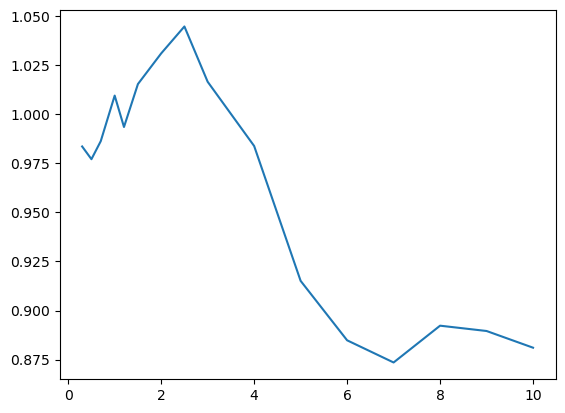

In [68]:
grafico_alvos = pd.Series(alvos)
grafico_alvos.plot()

In [42]:
tabela_resultados['Capital_acumulado'].iloc[-1]

1.016515135044958

In [ ]:
def alavancagem(preco_compra_2, preco_venda_2):

if preco_venda_2 > preco_compra_2:
    return True

In [17]:
halt_compra

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm,entrada,sinal_compra
time,,,,,,,,,,,,
2018-03-06 11:55:00,3966.683,3967.297,3965.457,3967.297,1824,1,7055,WDO$,5M,3965.88630,True,True
2018-03-14 13:15:00,4005.927,4006.540,4004.701,4005.314,1651,1,6288,WDO$,5M,4005.22190,True,True
2018-03-27 14:55:00,4085.641,4085.641,4083.188,4083.801,1757,1,6930,WDO$,5M,4083.64825,True,True
2018-03-28 12:50:00,4094.226,4095.452,4093.612,4094.839,1656,1,6550,WDO$,5M,4093.85765,True,True
2018-03-29 10:20:00,4077.045,4077.045,4074.599,4076.434,1913,1,5787,WDO$,5M,4074.81355,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-24 10:25:00,5201.278,5201.781,5192.220,5198.762,16536,1,50184,WDO$,5M,5196.32120,True,True
2023-03-10 09:00:00,5175.000,5187.500,5175.000,5187.500,17860,1,50405,WDO$,5M,5184.25000,True,True
2023-03-13 13:55:00,5260.000,5262.500,5257.500,5259.500,5487,1,17878,WDO$,5M,5258.17500,True,True


In [19]:
halt_compra = df[(df['sinal_compra'] == True) & (df['entrada']==True)]
halt_compra

# esse número representa cada candle sinalizador observado no filtro anterior (código da última semana)
n_indice = 51

# aqui pegaremos tres candles anteriores ao sinal (10 min, sendo timeframe de 5min) e 15 candles à frente (75min)
inicio_index = halt_compra.index[n_indice] - timedelta(minutes=25)
final_index = halt_compra.index[n_indice] + timedelta(minutes=150)

# filtramos nosso dataframe de ohlc
data_range = pd.date_range(start=inicio_index, end=final_index, freq='T')
df_figure = df[df.index.isin(data_range)]

# dessa forma apresentaremos 15 candles, sendo o sinal o terceiro candle (indexação 2 no python, já que começa do zero)
df_figure = df_figure.iloc[0:50]
candle_sinal = 5

# condições de entrada, alvos e stops descritos no post
entrada = df_figure.high.iloc[candle_sinal] + 0.01
stop_loss_candle_sinal = df_figure.low.iloc[candle_sinal] - 0.01
alvo_2x_candle_sinal = entrada + 2*(df_figure.high.iloc[candle_sinal] - df_figure.low.iloc[candle_sinal])

# Candlesticks
fig_halt_compra_result = go.Figure(data=[go.Candlestick(name=halt_compra.ticker[0],x=df_figure.index, open=df_figure['open'], high = df_figure['high'],
                                              low=df_figure['low'], close=df_figure['close'],increasing_line_color= 'green',
                                              decreasing_line_color= 'red', showlegend=True)])

# Candle sinal e entrada
fig_halt_compra_result.add_vrect(x0=df_figure.index[candle_sinal]-timedelta(minutes=2), x1=(df_figure.index[candle_sinal]+timedelta(minutes=2)), fillcolor="gray", opacity=0.25)

fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2),df_figure.index[-1]], 
                                    y=[df_figure.high[candle_sinal]+0.01,df_figure.high[candle_sinal]+0.01],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="black",
                                    name="Entrada", text=[" Máx sinal + 1 tick"], textposition="top right", showlegend=True))

# Linha delimitação do Stop loss
fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2), df_figure.index[-1]], 
                                    y=[stop_loss_candle_sinal, stop_loss_candle_sinal],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="red",
                                    name="Stop Loss", text=[" Mín sinal - 1 tick"], textposition="bottom right", showlegend=True))

# Linha delimitação do Take profit
fig_halt_compra_result.add_trace(go.Scatter(x=[df_figure.index[candle_sinal]-timedelta(minutes=2),df_figure.index[-1]], 
                                    y=[alvo_2x_candle_sinal, alvo_2x_candle_sinal],
                                    mode="lines+text", line_width=3, line_dash="dash", line_color="green",
                                    name="Take profit", text=["Proj. 2x candle sinal"], textposition="top right", showlegend=True))

fig_halt_compra_result.add_trace(go.Scatter(name='mm', x=df_figure.index, y=df_figure['mm'], marker_color='black'))

# Configurações do layout, como fundo branco, tamanho da imagem, margens, titulo do gráfico...
fig_halt_compra_result.update_layout(xaxis_rangeslider_visible=False, title_text='<b>PFR Compra Take profit / Stop loss',template = 'simple_white',
                            margin=dict(l=20, r=20, t=100, b=20), paper_bgcolor="#f7f8fa",width=800,height=600,
                            font=dict(family="Arial",size=17, color = 'black'),
                            legend=dict(orientation="h",yanchor="top",y=1.1,xanchor="right",x=1.05))

In [11]:
df

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm,entrada,sinal_compra
time,,,,,,,,,,,,
2018-02-28 09:00:00,3994.277,3999.182,3993.050,3994.890,2237,1,6108,WDO$,5M,NaN,False,False
2018-02-28 09:05:00,3994.277,3999.795,3993.050,3997.956,3048,1,7668,WDO$,5M,NaN,False,False
2018-02-28 09:10:00,3998.569,3998.569,3993.663,3993.663,2786,1,8455,WDO$,5M,NaN,False,False
2018-02-28 09:15:00,3994.277,3994.277,3991.211,3991.824,2520,1,8081,WDO$,5M,NaN,False,False
2018-02-28 09:20:00,3991.824,3993.050,3988.758,3990.598,2723,1,7806,WDO$,5M,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20 14:50:00,5255.500,5258.500,5255.000,5257.500,1048,0,7551,WDO$,5M,5256.200,False,False
2023-03-20 14:55:00,5257.000,5258.500,5255.000,5256.000,907,0,8516,WDO$,5M,5256.050,False,False
2023-03-20 15:00:00,5255.500,5258.000,5255.500,5257.000,660,0,4488,WDO$,5M,5255.925,False,False


In [22]:
df['sinal_vbt_entrada'] = sinal_vbt_entrada
df['sinal_vbt_saida'] = sinal_vbt_saida
df['lista_precos'] = lista_precos

backtest_halt_parte1 = vbt.Portfolio.from_signals(df['close'], df['sinal_vbt_entrada'], df['sinal_vbt_saida'],
                                                  direction='longonly', price=df['lista_precos'], freq='5T', size_type='value', size=1)
                                                  
backtest_halt_parte1.stats()

ValueError: Length of values (137343) does not match length of index (137308)

In [131]:
backtest_halt_parte1.orders.records_readable

,Order Id,Column,Timestamp,Size,Price,Fees,Side
0,0,0,2018-03-06 11:55:00,0.000252,3967.797,0.0,Buy
1,1,0,2018-03-06 12:15:00,0.000252,3964.957,0.0,Sell
2,2,0,2018-03-08 09:15:00,0.000251,3989.871,0.0,Buy
3,3,0,2018-03-08 10:00:00,0.000251,3985.192,0.0,Sell
4,4,0,2018-03-12 12:40:00,0.000249,4009.493,0.0,Buy
...,...,...,...,...,...,...,...
1051,1051,0,2023-03-13 14:25:00,0.000190,5273.000,0.0,Sell
1052,1052,0,2023-03-15 09:50:00,0.000189,5302.500,0.0,Buy
1053,1053,0,2023-03-15 10:15:00,0.000189,5293.500,0.0,Sell
1054,1054,0,2023-03-17 11:00:00,0.000189,5280.500,0.0,Buy
